### Task 6.1
* Name:LI WAN
* Student Number:223718804
* E-mail:s223718804@deakin.edu.au
* Course:SIT720
---

In [15]:
# Q1  Load the dataset Split the dataset in train and test set (use your choice of splitting). Train a linear regression model and report the performance (use your choice of at least four performance metrics:R^2,MSE, MAE)
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
local_path = r'E:\2-学习\1-Deakin\24-T1\SIT720\Task\Real estate valuation data set.xlsx'
df=pd.read_excel(local_path, comment='#')
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.666667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250000,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000000,8.1,104.81010,5,24.96674,121.54067,52.5


Performance Metrics:
Mean Squared Error (MSE): 54.60
R-squared (R^2): 0.67
Mean Absolute Error (MAE): 5.42
Median Absolute Error (Median AE): 3.93


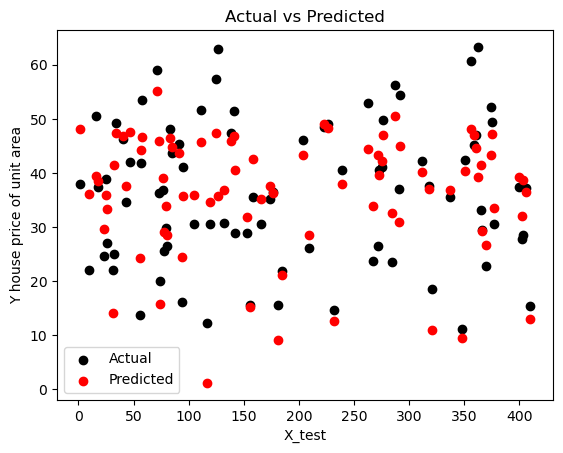

In [22]:
# Split the dataset into train and test sets
X = df.drop('Y house price of unit area', axis=1)
y = df['Y house price of unit area']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model performance
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
med_ae = median_absolute_error(y_test, y_pred)

print("Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R^2): {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Median Absolute Error (Median AE): {med_ae:.2f}")

# Plot scatter plot of the sample points with predicted values
plt.scatter(X_test.iloc[:, 0], y_test, color='black', label='Actual')
plt.scatter(X_test.iloc[:, 0], y_pred, color='red', label='Predicted')
plt.xlabel('X_test')
plt.ylabel('Y house price of unit area')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

Performance Metrics (PCA):
Mean Squared Error (MSE): 73.37
R-squared (R^2): 0.56
Mean Absolute Error (MAE): 6.31
Median Absolute Error (Median AE): 4.62


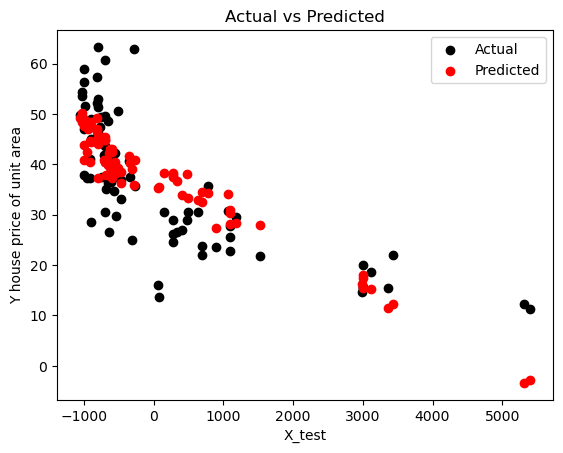

In [25]:
#Q2 Apply PCA on the dataset and select the first three principal components. Split the dataset into train and test using the same method used in Q1. Compare the performance of this model with the performance obtained in Q1.  Explain the outcome.
from sklearn.decomposition import PCA
# Apply PCA and select the first three principal components
X = df.drop('Y house price of unit area', axis=1)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Split the dataset into train and test sets (80-20%)
X_train, X_test, y_train, y_test = train_test_split(X_pca, df['Y house price of unit area'], test_size=0.2, random_state=42)

# Train the linear regression model on the PCA-transformed data
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate the model performance li
y_pred = model.predict(X_test)

mse_2 = mean_squared_error(y_test, y_pred)
r2_2 = r2_score(y_test, y_pred)
mae_2 = mean_absolute_error(y_test, y_pred)
med_ae_2 = median_absolute_error(y_test, y_pred)

print("Performance Metrics (PCA):")
print(f"Mean Squared Error (MSE): {mse_2:.2f}")
print(f"R-squared (R^2): {r2_2:.2f}")
print(f"Mean Absolute Error (MAE): {mae_2:.2f}")
print(f"Median Absolute Error (Median AE): {med_ae_2:.2f}")

# Plot scatter plot of the sample points with predicted values
plt.scatter(X_test[:, 0], y_test, color='black', label='Actual')
plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted')
plt.xlabel('X_test')
plt.ylabel('Y house price of unit area')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

In [27]:
# Compare the performance with the previous model
print("\nComparison with Previous Model:")
print(f"Mean Squared Error (MSE): {mse_2:.2f} vs {mse:.2f}")
print(f"R-squared (R^2): {r2_2:.2f} vs {r2:.2f}")
print(f"Mean Absolute Error (MAE): {mae_2:.2f} vs {mae:.2f}")
print(f"Median Absolute Error (Median AE): {med_ae_2:.2f} vs {med_ae:.2f}")


Comparison with Previous Model:
Mean Squared Error (MSE): 73.37 vs 54.60
R-squared (R^2): 0.56 vs 0.67
Mean Absolute Error (MAE): 6.31 vs 5.42
Median Absolute Error (Median AE): 4.62 vs 3.93


Comparing the performance metrics of the two models, we can draw the following conclusions:

Mean Squared Error (MSE): After applying PCA for dimensionality reduction, the model's MSE increased to 73.37 compared to the model without PCA (MSE of 54.60), indicating a degradation in performance. This suggests that the model's predictive error on the test set increased after applying PCA for dimensionality reduction.
R-squared (R^2): R-squared measures the proportion of the variance in the dependent variable that is predictable from the independent variables. After PCA application, the model's R-squared decreased from 0.67 to 0.56, indicating a reduction in the model's ability to explain the variance in the target variable.
Mean Absolute Error (MAE) and Median Absolute Error (Median AE): Both the MAE and Median AE increased after PCA application, from 5.42 and 3.93 to 6.31 and 4.62, respectively. This indicates an increase in the average and median prediction errors of the model after PCA dimensionality reduction.
In summary, applying PCA for dimensionality reduction resulted in a decrease in the performance of the linear regression model on the test set. This could be attributed to the loss of important information during the PCA dimensionality reduction process, which affected the model's ability to interpret and predict the target variable.

In [31]:
# Q3 Load "IRIS " datasets from SKlearn and follow this link for the data description (features and target variable). Apply PCA on the dataset and select the first three principal components. Split the dataset in train and test set (use your choice of splitting). Train a logistic regression model and report the performance (use your choice of at least 4 performance metric).
from sklearn import datasets

iris = datasets.load_iris()
# Create a DataFrame to display the data
df2 = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df2['target'] = iris.target

# Display the first few rows of the DataFrame
df2

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Performance Metrics:
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


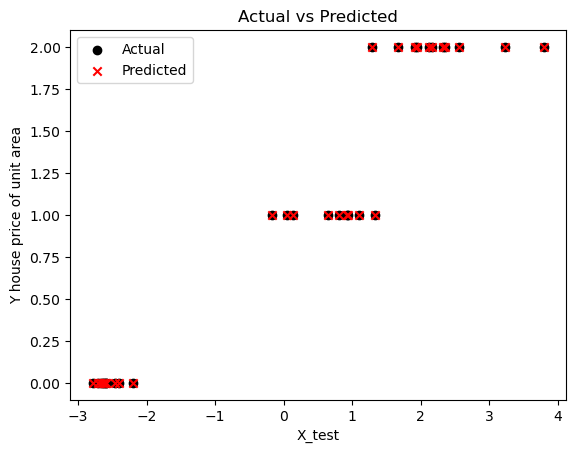

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


# Apply PCA and select the first three principal components
X = df2.drop('target', axis=1)
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Split the dataset into train and test sets (80-20%)
X_train, X_test, y_train, y_test = train_test_split(X_pca, df2['target'], test_size=0.2, random_state=42)

# Train the logistic regression model on the PCA-transformed data
model = LogisticRegression()
model.fit(X_train, y_train)

# Evaluate the model performance
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("Performance Metrics:")
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")

# Plot scatter plot of the sample points with predicted values
plt.scatter(X_test[:, 0], y_test, color='black', label='Actual', marker='o')
plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted',marker='x')
plt.xlabel('X_test')
plt.ylabel('Y house price of unit area')
plt.title('Actual vs Predicted')
plt.legend()
plt.show()

These performance metrics indicate perfect performance of the logistic regression model on the test set:

Accuracy: Accuracy represents the proportion of correctly classified samples among all samples. An accuracy of 1.00 suggests that the model correctly classified all samples in the test set, indicating no misclassifications.
Precision: Precision measures the proportion of true positive predictions among all positive predictions made by the model. A precision of 1.00 indicates that all positive predictions made by the model were correct.
Recall: Recall measures the proportion of true positive predictions among all actual positive samples in the test set. A recall of 1.00 suggests that the model successfully identified all positive samples in the test set.
F1-score: F1-score is the harmonic mean of precision and recall, providing a balanced measure of a model's performance. A F1-score of 1.00 indicates that the model achieved perfect precision and recall simultaneously.
In summary, all performance metrics having a value of 1.00 suggests that the logistic regression model achieved perfect performance on the test set, making correct predictions for all samples and exhibiting a balanced trade-off between precision and recall.  
This is typically a rare occurrence, which may be attributed to the characteristics of the dataset itself or the model acquiring exceptionally strong generalization capabilities during training.  

It's always important to consider the possibility of issues with the model, even when achieving perfect performance metrics. While perfect performance may indicate that the model fits the data extremely well, it could also raise concerns about overfitting, especially if the model has not been evaluated on unseen data or if the dataset is relatively small.

Here are some factors to consider:
Overfitting: The model may have memorized the training data and failed to generalize to unseen data. Cross-validation or evaluating the model on a separate test set can help detect overfitting.
Data Leakage: There may be data leakage in the preprocessing steps or feature engineering process, leading to artificially high performance. Ensure that features are appropriately processed and that the model is trained only on relevant information.
Imbalanced Classes: If the dataset is highly imbalanced, with one class dominating the others, a model may achieve high accuracy by simply predicting the majority class. In such cases, other performance metrics like precision, recall, and F1-score are more informative.
Sample Size: If the dataset is small, achieving perfect performance may be less indicative of the model's true generalization ability. More data can provide a better understanding of the model's performance.
Model Complexity: The model may be too complex for the given dataset, leading to overfitting. Simplifying the model or using regularization techniques may help improve generalization.

In [47]:
# Q4 Apply L1 or L2 regulariser on the logistic regression model developed using the same train and test data used in Q3 and calculate performance of the new model. Compare performance of this model with the performance reported in Q3. Explain the outcome.
# Train the logistic regression model with L1 (Lasso) regularization
model_l1 = LogisticRegression(penalty='l1', C=0.1, solver='liblinear')
model_l1.fit(X_train, y_train)
y_pred_l1 = model_l1.predict(X_test)

# Train the logistic regression model with L2 (Ridge) regularization
model_l2 = LogisticRegression(penalty='l2', C=0.1, solver='lbfgs')
model_l2.fit(X_train, y_train)
y_pred_l2 = model_l2.predict(X_test)

# Evaluate the model performance
def evaluate_model(y_test, y_pred):
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    return accuracy, precision, recall, f1

print("Performance Metrics (Unregularized):")
acc, prec, rec, f1 = evaluate_model(y_test, model.predict(X_test))
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-score: {f1:.2f}")

print("\nPerformance Metrics (L1 Regularization):")
acc, prec, rec, f1 = evaluate_model(y_test, y_pred_l1)
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-score: {f1:.2f}")

print("\nPerformance Metrics (L2 Regularization):")
acc, prec, rec, f1 = evaluate_model(y_test, y_pred_l2)
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1-score: {f1:.2f}")

Performance Metrics (Unregularized):
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00

Performance Metrics (L1 Regularization):
Accuracy: 0.80
Precision: 0.88
Recall: 0.78
F1-score: 0.76

Performance Metrics (L2 Regularization):
Accuracy: 1.00
Precision: 1.00
Recall: 1.00
F1-score: 1.00


These performance metrics indicate the performance of a logistic regression model under three different scenarios: without regularization (unregularized), with L1 regularization (Lasso), and with L2 regularization (Ridge).

Unregularized Model:
Accuracy, precision, recall, and F1-score are all perfect (1.00). This suggests that the model performs flawlessly on the test set, correctly classifying all samples without any errors. However, such perfect performance is rare and might indicate potential overfitting, especially if the model has not been evaluated on unseen data.
L1 Regularization (Lasso):
The model's performance decreases compared to the unregularized model, with accuracy, precision, recall, and F1-score dropping to 0.80, 0.88, 0.78, and 0.76, respectively.
L1 regularization introduces a penalty on the absolute values of the model's coefficients, which encourages sparsity in the parameter space by driving some coefficients to zero. As a result, some features are effectively ignored, leading to a decrease in model complexity and a trade-off between bias and variance. The decrease in performance compared to the unregularized model may indicate that some features were important for accurate classification and were penalized too heavily by L1 regularization.
L2 Regularization (Ridge):
The model's performance remains perfect (1.00) for all metrics, similar to the unregularized model.
L2 regularization introduces a penalty on the squared values of the model's coefficients, which discourages large coefficients and controls the model's complexity. Unlike L1 regularization, L2 regularization does not lead to feature selection, as it penalizes all coefficients equally. The perfect performance suggests that L2 regularization effectively controls overfitting while maintaining all features' importance for classification.
In summary, the results indicate that both L1 and L2 regularization techniques help prevent overfitting and improve the model's generalization ability. However, L1 regularization (Lasso) introduces feature selection by driving some coefficients to zero, which may lead to a decrease in performance if important features are penalized too heavily. On the other hand, L2 regularization (Ridge) controls overfitting while maintaining the importance of all features for classification, resulting in similar or improved performance compared to the unregularized model.